In [25]:
using Plots

In [26]:
SENSOR_RANGE = 150;

In [27]:
# Hyperbola Properties

y0 = 0;

# Hyperbola #1 - First Farthest from origin

x1 = 0;
a1 = SENSOR_RANGE * 0.025;
b1 = SENSOR_RANGE * 0.1;

# Hyperbola #2 - Second Farthest from origin

x2 = 0;
a2 = SENSOR_RANGE * 0.05;
b2 = SENSOR_RANGE * 0.075;

# Hyperbola #3 - Second Closest to origin

x3 = 0;
a3 = SENSOR_RANGE * 0.075;
b3 = SENSOR_RANGE * 0.05;

# Hyperbola #4 - First Closest to origin

# x4 = 0;
# a4 = SENSOR_RANGE * 0.1;
# b4 = SENSOR_RANGE * 0.025;

### Helpful Page: https://study.com/academy/lesson/derive-the-equation-of-a-hyperbola-from-the-foci.html

In [28]:
function obs1(state)
    
    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d1_neg = ( (x - x1)^2 / (a1^2) ) + ( (y - y0)^2 / (b1^2) )
    
    # Calculating the probability associated with the observation.

    if( (d1_neg >= 1) && (x < 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d1_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs1 (generic function with 1 method)

In [29]:
function obs2(state)

    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d1_neg = ( (x - x1)^2 / (a1^2) ) + ( (y - y0)^2 / (b1^2) )
    d2_neg = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    
    # Calculating the probability associated with the observation.

    if( (d1_neg < 1) && (d2_neg >= 1) && (x < 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d1_neg < 1) && (d2_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs2 (generic function with 1 method)

In [30]:
function obs3(state)

    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d2_neg = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    d3_neg = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    
    # Calculating the probability associated with the observation.

    if( (d2_neg < 1) && (d3_neg >= 1) && (x < 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d2_neg < 1) && (d3_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs3 (generic function with 1 method)

In [31]:
function obs4(state)

    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d3_neg = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    
    # Calculating the probability associated with the observation.

    if( (d3_neg < 1) && (x < 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d3_neg < 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs4 (generic function with 1 method)

In [32]:
function obs5(state)
    
    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d3_pos = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    
    # Calculating the probability associated with the observation.

    if( (d3_pos < 1) && (x >= 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d3_pos < 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs5 (generic function with 1 method)

In [33]:
function obs6(state)
    
    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d3_pos = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    d2_pos = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    
    # Calculating the probability associated with the observation.

    if( (d2_pos < 1) && (d3_pos >= 1) && (x >= 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d2_pos < 1) && (d3_pos >= 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE))
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs6 (generic function with 1 method)

In [34]:
function obs7(state)
    
    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d2_pos = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    d1_pos = ( (x - x1)^2 / (a1^2) ) + ( (y - y0)^2 / (b1^2) )
    
    # Calculating the probability associated with the observation.

    if( (d1_pos < 1) && (d2_pos >= 1) && (x >= 0) && (range < SENSOR_RANGE/2) )
        return 1::Int64
    end
    
    if( (d1_pos < 1) && (d2_pos >= 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE))
        return 2-2*range/SENSOR_RANGE
    end
    
    return 0::Int64
    
end

obs7 (generic function with 1 method)

In [35]:
function obs0(state)
    
    # Converting the properties of the state into the "relative bearing" and the "range".
    rel_brg = state[2]-state[4]
    range = state[1]
    
    # Converting the "relative bearing" and the "range" into "x" and "y" coordinates.
    x = range * cosd(rel_brg)
    y = range * sind(rel_brg)
    
    # Checking to see whether the observation is within (d >= 1) or not within (d < 1) the observation state.
    
    d1_neg = ( (x - x1)^2 / (a1^2) ) + ( (y - y0)^2 / (b1^2) )
    d2_neg = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    d3_neg = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    d3_pos = ( (x - x3)^2 / (a3^2) ) + ( (y - y0)^2 / (b3^2) )
    d2_pos = ( (x - x2)^2 / (a2^2) ) + ( (y - y0)^2 / (b2^2) )
    d1_pos = ( (x - x1)^2 / (a1^2) ) + ( (y - y0)^2 / (b1^2) )
    
    # Calculating the probability associated with the observation.

    if (!(obs1(state) > 0) && !(obs2(state) > 0) && !(obs3(state) > 0) && !(obs4(state) > 0) && !(obs5(state) > 0) && !(obs6(state) > 0) && !(obs7(state) > 0))
        return 1::Int64
    elseif( (d1_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2*range/SENSOR_RANGE - 1
    elseif( (d1_neg < 1) && (d2_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2*range/SENSOR_RANGE - 1
    elseif( (d2_neg < 1) && (d3_neg >= 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2*range/SENSOR_RANGE - 1
    elseif( (d3_neg < 1) && (x < 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2*range/SENSOR_RANGE - 1
    elseif( (d3_pos < 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE) )
        return 2*range/SENSOR_RANGE - 1
    elseif( (d2_pos < 1) && (d3_pos >= 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE))
        return 2*range/SENSOR_RANGE - 1
    elseif( (d1_pos < 1) && (d2_pos >= 1) && (x >= 0) && (SENSOR_RANGE/2 < range < SENSOR_RANGE))
        return 2*range/SENSOR_RANGE - 1
    end
    
    return 0::Int64
    
end

obs0 (generic function with 1 method)

In [36]:
function g(x, a, xp, o)
    if o == 1 return obs1(xp) end
    if o == 2 return obs2(xp) end
    if o == 3 return obs3(xp) end
    if o == 4 return obs4(xp) end
    if o == 5 return obs5(xp) end
    if o == 6 return obs6(xp) end
    if o == 7 return obs7(xp) end
    if o == 0 return obs0(xp) end
end

g (generic function with 1 method)

In [37]:
function h(x, rng)
    weights = [obs1(x), obs2(x), obs3(x), obs4(x), obs5(x), obs6(x), obs7(x), obs0(x)]
    obsers::Array{Int64,1} = [1, 2, 3, 4, 5, 6, 7, 0]
    return sample(obsers, Weights(weights))::Int64
end

h (generic function with 1 method)

In [38]:
##########

# Plotting of the eight (8) observation regions.

##########

In [39]:
# Creation of Hyperbola #1

x1_start = a1 + x1;
x1_degrees = collect(x1_start:300);

x1_array_pos = zeros(length(x1_degrees),1);
y1_array_pos = zeros(length(x1_degrees),1);

x1_count = 0;

for degree_counter in x1_degrees
    
    x1_count += 1
    
    x1_array_pos[x1_count] = degree_counter;
    y1_array_pos[x1_count] = b1 * sqrt( (degree_counter - x1)^2 / (a1^2) + -1) + y0;
    
end

y1_array_neg = - y1_array_pos;
x1_array_neg = - x1_array_pos;

In [40]:
# Creation of Hyperbola #2

x2_start = a2 + x2;
x2_degrees = collect(x2_start:300);

x2_array_pos = zeros(length(x2_degrees),1);
y2_array_pos = zeros(length(x2_degrees),1);

x2_count = 0;

for degree_counter in x2_degrees
    
    x2_count += 1
    
    x2_array_pos[x2_count] = degree_counter;
    y2_array_pos[x2_count] = b2 * sqrt( (degree_counter - x2)^2 / (a2^2) + -1) + y0;
    
end

y2_array_neg = - y2_array_pos;
x2_array_neg = - x2_array_pos;

In [41]:
# Creation of Hyperbola #3

x3_start = a3 + x3;
x3_degrees = collect(x3_start:300);

x3_array_pos = zeros(length(x3_degrees),1);
y3_array_pos = zeros(length(x3_degrees),1);

x3_count = 0;

for degree_counter in x3_degrees
    
    x3_count += 1
    
    x3_array_pos[x3_count] = degree_counter;
    y3_array_pos[x3_count] = b3 * sqrt( (degree_counter - x3)^2 / (a3^2) + -1) + y0;
    
end

y3_array_neg = - y3_array_pos;
x3_array_neg = - x3_array_pos;

In [42]:
# Creation of Hyperbola #4

# x4_start = a4 + x4;
# x4_degrees = collect(x4_start:300);

# x4_array_pos = zeros(length(x4_degrees),1);
# y4_array_pos = zeros(length(x4_degrees),1);

# x4_count = 0;

# for degree_counter in x4_degrees
    
#     x4_count += 1
    
#     x4_array_pos[x4_count] = degree_counter;
#     y4_array_pos[x4_count] = b4 * sqrt( (degree_counter - x4)^2 / (a4^2) + -1) + y0;
    
# end

# y4_array_neg = - y4_array_pos;
# x4_array_neg = - x4_array_pos;

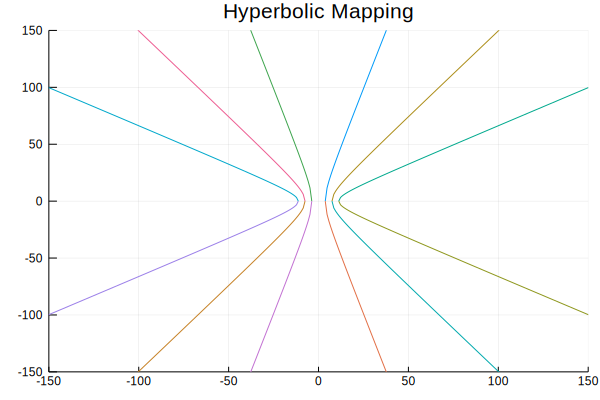

In [43]:
# Plotting Hyperbola Set #1

plot(x1_array_pos, y1_array_pos)
plot!(x1_array_pos, y1_array_neg)
plot!(x1_array_neg, y1_array_pos)
plot!(x1_array_neg, y1_array_neg)

# Plotting Hyperbola Set #1

plot!(x2_array_pos, y2_array_pos)
plot!(x2_array_pos, y2_array_neg)
plot!(x2_array_neg, y2_array_pos)
plot!(x2_array_neg, y2_array_neg)

# Plotting Hyperbola Set #3

plot!(x3_array_pos, y3_array_pos)
plot!(x3_array_pos, y3_array_neg)
plot!(x3_array_neg, y3_array_pos)
# plot!(x3_array_neg, y3_array_neg)
plot!(x3_array_neg, y3_array_neg, xlims = (-SENSOR_RANGE, SENSOR_RANGE), ylims = (-SENSOR_RANGE, SENSOR_RANGE), title = "Hyperbolic Mapping", legend = false)

# Plotting Hyperbola Set #4

# plot!(x4_array_pos, y4_array_pos)
# plot!(x4_array_pos, y4_array_neg)
# plot!(x4_array_neg, y4_array_pos)
# plot!(x4_array_neg, y4_array_neg)
# plot!(x4_array_neg, y4_array_neg, xlims = (-SENSOR_RANGE, SENSOR_RANGE), ylims = (-SENSOR_RANGE, SENSOR_RANGE))